# Prediction of heart disease at early stage using machine learning

## 1. Problem Identification
***
Heart disease is the leading cause of death in the US, and it produces immense health and economic burens [(CDC 2020)](https://www.cdc.gov/heartdisease/)

* more than 600,000 people die from heart disease each year in the US - that's 1 in every 4 deaths 

* costs associated with health care services, medicines, and lost productivity due to death were estimated to be about $219 billion each year from 2014-2015 in the US 

* about 1 in 3 deaths related to heart diseases are preventable -- early action is important [(MMWR 2014)](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6317a1.htm)
 
#### Given a set of health parameters from routine monitoring, can we robustly predict the risk of heart disease as early as possible?


> <img align='center' width='200' height='150' src="hd-facts.jpg">

### Dataset description: 

The original database contains 76 attributes, but all published studies refer to using a subset of 14 of them. This project used the Cleveland database downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). Below is a description of each of the 14 attributes: 


| No. | Variable | Description | Data summary |
| --- | --- | --- | --- |
| 1 | age | age in years | continuous |
| 2 | sex | male or female | 0=female; 1=male |
| 3 | cp | chest pain type | 1=typical angina<br/> 2=atypical angina<br/> 3=non-anginal pain<br/> 4=asymptomatic |
| 4 | trestbps | resting blood pressure | continuous, in mmHg |
| 5 | chol | Serum cholesterol | continuous |
| 6 | fbs | fasting blood sugar | 0: <=120 mg/dL<br/> 1: >120 mg/dL |
| 7 | restecg | resting electrocardiographic results | 0=normal<br/> 1=having ST-T wave abnormal<br/> 2=left ventricular hypertrophy |
| 8 | thalach | maximum heart rate achieved | continuous |
| 9 | exang | exercise induced angina | 0=no; 1=yes |
| 10 | oldpeak | ST depression induced by exercise relative to rest | continuous |
| 11 | slope | the slope of the peak exercise ST segment  | 1=upsloping<br/> 2=flat<br/> 3=downsloping |
| 12 | ca | number of major vessels colored by flouroscopy | integer, 0-3 |
| 13 | thal | a bood disorder called thalassemia | 3=normal<br/> 6=fixed defect<br/> 7=reversable defect |
| 14 | target | diagnosis of heart disease | 0=no; 1=yes |


## 2. Data wrangling
***
* data loading
* data definition: column names, data type, summary statistics, counts of unique values etc.
* data cleaning: missing values, duplicates etc.

In [1]:
#load basic libraries
import os
import numpy as np #linear algebra
import pandas as pd # data processing
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
cwd = os.getcwd()
print('The current working directory is %s' %cwd)

for subfolder in ['data','models','figures']:
    newdir = os.path.join(cwd,subfolder)
    if not os.path.exists(newdir):
        os.makedirs(newdir)
    
os.listdir()

The current working directory is /Users/hhl/Desktop/Springboard062020/Springboard/Capstone2


['Capstone2-Step0-Ideas.pdf',
 '.DS_Store',
 'hd-facts.jpg',
 'datasets_216167_477177_heart.csv',
 'Heart-Disease-Prediction-master',
 'cleveland.csv',
 'models',
 'processed.cleveland.data',
 'Capstone2-proposal [Hehuan Liao].docx',
 'figures',
 'Capstone2-Step1-Proposal.pdf',
 'Capstone_Two_Step_2__Data_Wrangling.pdf',
 '.ipynb_checkpoints',
 'datasets_heart.csv',
 'Capstone2-ideas [Hehuan Liao].docx',
 'data',
 'heart-v0.ipynb',
 'catboost_info']

In [3]:
df = pd.read_csv('processed.cleveland.data',header=None)
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
df.isnull().sum().sort_values(ascending=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [8]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
#fill na with mode
df[['ca','thal']] = df[['ca','thal']].fillna(df[['ca','thal']].mode().iloc[0])

In [11]:
df.ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [12]:
df[df.duplicated()]  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [13]:
df.thal.value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
df['target'] = df.target.map({0:0,
                             1:1,
                             2:1,
                             3:1,
                             4:1})

In [16]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [17]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

In [18]:
df.target.value_counts() ##relatively balanced

0    164
1    139
Name: target, dtype: int64

In [19]:
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [20]:
df.to_csv('data/heart_clean.csv',index=False)

## 3. Exploratory data analysis 
***
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

- pandas_profiling.ProfileReport()
  * data quality: data type, missings, unique values
  * data spread: summary statistics, and histograms
  * relationships between variables: scatter plots, correlation matrix etc.

In [21]:
df = pd.read_csv('data/heart_clean.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


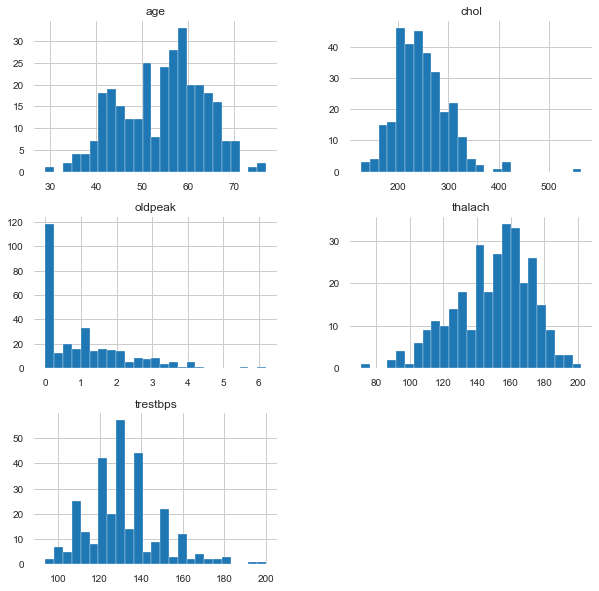

In [24]:
_=df[['age','trestbps','chol','thalach','oldpeak']].hist(bins=25,figsize=(10,10))

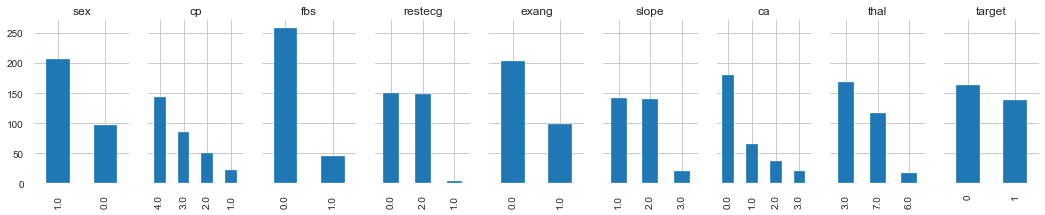

In [25]:
cat = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
fig,axs = plt.subplots(1,9,figsize=(18,3),sharey=True)
for i,cat in enumerate(df[cat]):
    df[cat].value_counts().plot(kind='bar',ax=axs[i]).set_title(cat)

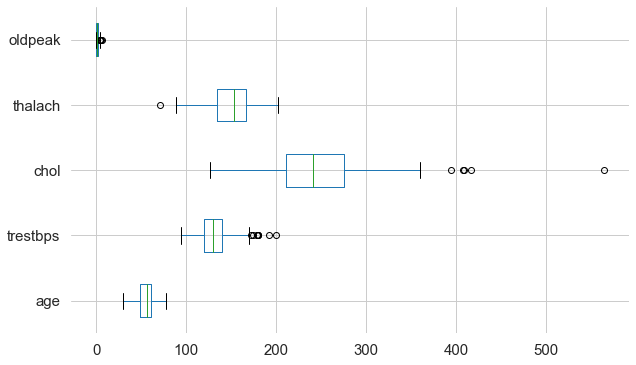

In [26]:
_=df[['age','trestbps','chol','thalach','oldpeak']].boxplot(grid=True,rot=0,figsize=(10,6),fontsize=15,vert=False)

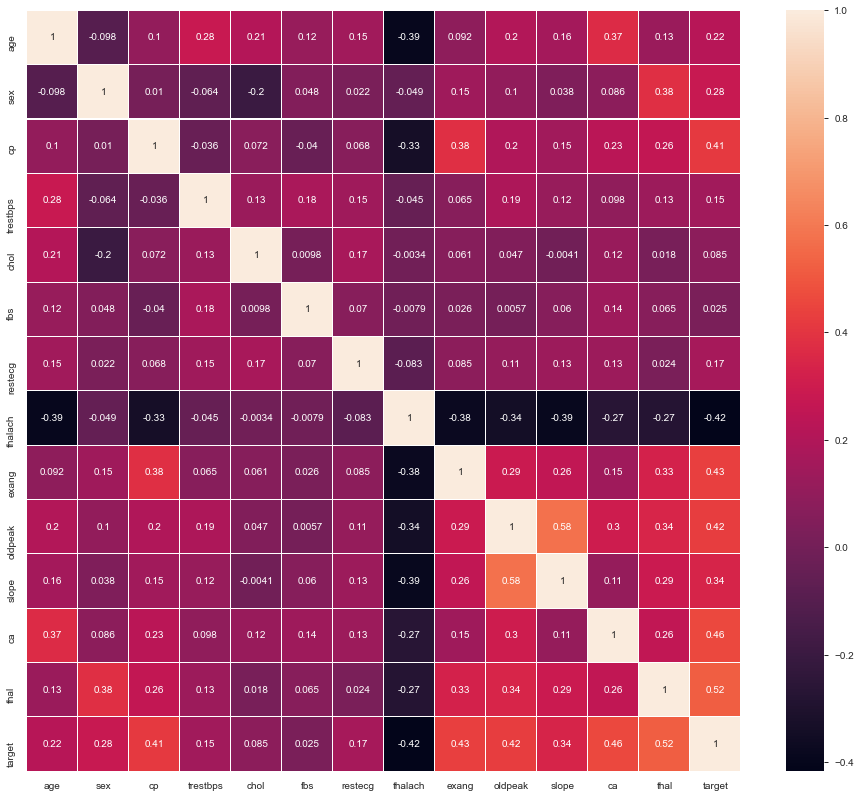

In [27]:
#Calculate the correlation coefficients
corr = df.corr()

corr.round(2).style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(16,14))
_=sns.heatmap(corr,linewidths=.1, annot=True)

In [28]:
# profile = pandas_profiling.ProfileReport(df, title='Pandas profile report - heart attack dataset', minimal=False)
# profile.to_file(output_file='data/EDAreport.html')

## 4. Pre-processing and training data development
***
* Create dummy features for categorical variables
* Standardize the magnitude of numeric features
* Split into testing and training datasets

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
#create dummy features for categorical variables
##sex, cp (chest pain type), restecg (resting electrocardiographic results), exang (exercise induced angina), slope (the slope of the peak exercise ST segment), and thal (blood disorder type) are categorical variables
##fbs is boolean; ca (number of major vessels) is ordinal
df2 = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','thal'], drop_first=True)
df2.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,0,1,0,0,0,1,0,1,0,0,1,1,0
1,67.0,160.0,286.0,108.0,1.5,3.0,1,1,0,0,1,0,0,1,1,1,0,0,0
2,67.0,120.0,229.0,129.0,2.6,2.0,1,1,0,0,1,0,0,1,1,1,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0.0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [31]:
#train-test split
y = df2.target
X = df2.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, stratify=y, random_state=52)
#check whether the data is equally splitted or not (e.g. data imbalance problem)
print(y_train.value_counts())
print(y_test.value_counts())

0    123
1    104
Name: target, dtype: int64
0    41
1    35
Name: target, dtype: int64


In [32]:
#standardization 
#build scaler based on training data and apply it to test data
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## 5. Modeling
***

#### Classifiers 

* Naive Bayes
  * Simple, fast, low computation cost, and accurate 
  * Cannot learn interactions btw features(assumes the predictors are independent) <br/><br/>

* Logistic Regression
  * lots of ways to regularize the model (e.g. lasso, ridge), and don't have to worry as much about features being correlated, like in Naive Bayes
  * have a nice probabilistic interpretation - use it if you want a probabilistic framework (_to easily adjust classification thresholds_) or if you expect to receive more training data in the future that you want to quickly incorporate into your model 
  * a linear classifier, assume some sort of linear relationship btw the data <br/><br/>
       
* K-Nearest Neighbors
  * No assumptions about data; simple and intuitive, relatively high accuracy, easy to implement for multi-class problem, can be used for both classification and regression problems
  * Curse of dimensionality, does not perform well on imbalanced data, sensitive to outliers, distance based, slow as dataset grows <br/><br/>

* Support Vector Machines (SVMs, linear, nonlinear)
  * high accuracy, especially popular in text classification problems where very high-dimensional spaces are the norm
  * works poorly with overlapping classes and is also sensitive to the type of kernel used <br/><br/>

* Decision tree 
      
* Ensemble methods: Random Forests
   * easy to interpret and explain
   * can handle feature interctions, non-parametric (don't have to worry about outliers or whether the data is linearly separable)
   * fast and scalable
   * don't support online learning - have to rebuild trees when new examples come on <br/><br/>
* Ensemble methods: AdaBoost

* Ensemble methods: Gradient Boosting or gradient boosting machines GBM
    * GradientBoostingClassifier with Scikit-Learn 
    * XGBoost - extreme gradient boosting: computational efficiency and often better model performance
    * LightGBM - light gradient boosted machine: 
           * high speed, high accuracy, can use categorical features as input directly - no need to convert to one-hot coding
           * sensitive to overfitting and can easily overfit small data (10,000+ observations suggested)    
    * CatBoost - category gradient boosting: in addition to computational speed improvements, the primary benefit of the CatBoost is support for categorical input variables

* MLPNN
   * Classifies non-linearly separable data points
   * Solves complex problems including various parameters, and manages data sets through a large number of features, specifically non-linear ones

In [33]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_recall_curve, roc_curve, auc,roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import time

In [34]:
#Naive Bayes classifier
## import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
## Create a Gaussian Classifier
gnb = GaussianNB()
## train the model using the training set
gnb.fit(X_train,y_train)
##predict output
y_pred = gnb.predict(X_test)
print('--- %s seconds ---' % round((time.time()-start_time),5))
precision,recall,fscore,support = score(y_test, y_pred, pos_label=1, average='binary')
gnb_fpr,gnb_tpr,gnb_threshold = roc_curve(y_test,y_pred)
gnb_auc = auc(gnb_fpr,gnb_tpr)
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(precision,3),
               round(recall,3),
               round((y_pred==y_test).sum()/len(y_pred),3),
               round(gnb_auc,3)))

--- 0.00216 seconds ---
Precision:0.725 / Recall:0.829 / Accuracy:0.776 / AUC:0.78


In [35]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
random_state = 52

def pipe(X_train_data, X_test_data, y_train_data, y_test_data,
                 model, param_grid, cv, scoring,
                  do_probabilities):
    gs = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = cv,
    n_jobs = -1,
    scoring = scoring)
    fitted_model = gs.fit(X_train_data,y_train_data)
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    precision,recall,fscore,support = score(y_test_data, pred, pos_label=1, average='binary')
    accuracy = round((pred==y_test_data).sum()/len(pred),3)
    fpr,tpr,threshold = roc_curve(y_test_data,pred)
    s_auc = auc(fpr,tpr)
    return fitted_model,pred,precision,recall,accuracy,s_auc,fpr,tpr

start_time = time.time()

model = LogisticRegression(random_state=random_state,max_iter=2000) # have to increase the max number of iterations as the model didn't converge with default settings
param_grid = {'C':[0.01,0.1,1,5,6,7,8,9,10],
                'penalty':['l1','l2']}
cv = StratifiedKFold(n_splits=5)
scoring = 'recall'

lr,lr_pred,lr_precision,lr_recall,lr_accuracy,lr_auc,lr_fpr,lr_tpr = pipe(X_train_scaled, X_test_scaled, y_train, y_test, 
                                                                          model, param_grid, cv=cv,scoring=scoring,
                                                                          do_probabilities=False)
print(lr.best_params_)
print('--- %s seconds ---' % round((time.time()-start_time),5))
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(lr_precision,3),
               round(lr_recall,3),round(lr_accuracy,3),round(lr_auc,3)))

{'C': 5, 'penalty': 'l2'}
--- 1.32081 seconds ---
Precision:0.784 / Recall:0.829 / Accuracy:0.816 / AUC:0.817


In [36]:
#knn
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()

model = KNeighborsClassifier()
param_grid = {'n_neighbors':[10,15,16,17,18,19]
                }
cv = StratifiedKFold(n_splits=5)
scoring = 'recall'

knn,knn_pred,knn_precision,knn_recall,knn_accuracy,knn_auc,knn_fpr,knn_tpr = pipe(X_train_scaled, X_test_scaled, y_train, y_test, 
                                                                          model, param_grid, cv=cv,scoring=scoring,
                                                                          do_probabilities=False)
print(knn.best_params_)
print('--- %s seconds ---' % round((time.time()-start_time),5))
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(knn_precision,3),
               round(knn_recall,3),round(knn_accuracy,3),round(knn_auc,3)))

{'n_neighbors': 17}
--- 0.08873 seconds ---
Precision:0.757 / Recall:0.8 / Accuracy:0.789 / AUC:0.79


In [37]:
#svm
from sklearn.svm import SVC

start_time = time.time()

model = SVC()
# A smaller C creates a small-margin hyperplane; a smaller Gamma loosely fit the training set
param_grid = [{'kernel':['linear'],'C':[1,10,100,1000]},
              {'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1,10,100,1000]}
             ]

cv = StratifiedKFold(n_splits=5)
scoring = 'recall'

svm,svm_pred,svm_precision,svm_recall,svm_accuracy,svm_auc,svm_fpr,svm_tpr = pipe(X_train_scaled, X_test_scaled, y_train, y_test, 
                                                                          model, param_grid, cv=cv,scoring=scoring,
                                                                          do_probabilities=False)
print(svm.best_params_)
print('--- %s seconds ---' % round((time.time()-start_time),5))
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(svm_precision,3),
               round(svm_recall,3),round(svm_accuracy,3),round(svm_auc,3)))

{'C': 10, 'kernel': 'linear'}
--- 1.93778 seconds ---
Precision:0.812 / Recall:0.743 / Accuracy:0.803 / AUC:0.798


In [38]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()

model = DecisionTreeClassifier(random_state=52)
param_grid = {'criterion':['gini','entropy'],
              'max_depth': np.arange(3,15)
                }
cv = StratifiedKFold(n_splits=5)
scoring = 'recall'

tree,tree_pred,tree_precision,tree_recall,tree_accuracy,tree_auc,tree_fpr,tree_tpr = pipe(X_train, X_test, y_train, y_test, 
                                                                          model, param_grid, cv=cv,scoring=scoring,
                                                                          do_probabilities=False)
print(tree.best_params_)
print('--- %s seconds ---' % round((time.time()-start_time),5))
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(tree_precision,3),
               round(tree_recall,3),round(tree_accuracy,3),round(tree_auc,3)))

{'criterion': 'gini', 'max_depth': 4}
--- 0.19916 seconds ---
Precision:0.8 / Recall:0.686 / Accuracy:0.776 / AUC:0.77


In [39]:
#random forest
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

model = RandomForestClassifier(random_state=52)
param_grid = {'n_estimators':[50,100,150],
                'max_depth':[5,10,15,None],
                'max_features':['sqrt'],
                'min_samples_split':[3,5],
                 'bootstrap':[True]
                }
cv = StratifiedKFold(n_splits=5)
scoring = 'recall'

rf,rf_pred,rf_precision,rf_recall,rf_accuracy,rf_auc,rf_fpr,rf_tpr = pipe(X_train, X_test, y_train, y_test, 
                                                                          model, param_grid, cv=cv,scoring=scoring,
                                                                          do_probabilities=False)
print(rf.best_params_)
print('--- %s seconds ---' % round((time.time()-start_time),5))
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(rf_precision,3),
               round(rf_recall,3),round(rf_accuracy,3),round(rf_auc,3)))

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100}
--- 4.43587 seconds ---
Precision:0.853 / Recall:0.829 / Accuracy:0.855 / AUC:0.853


18


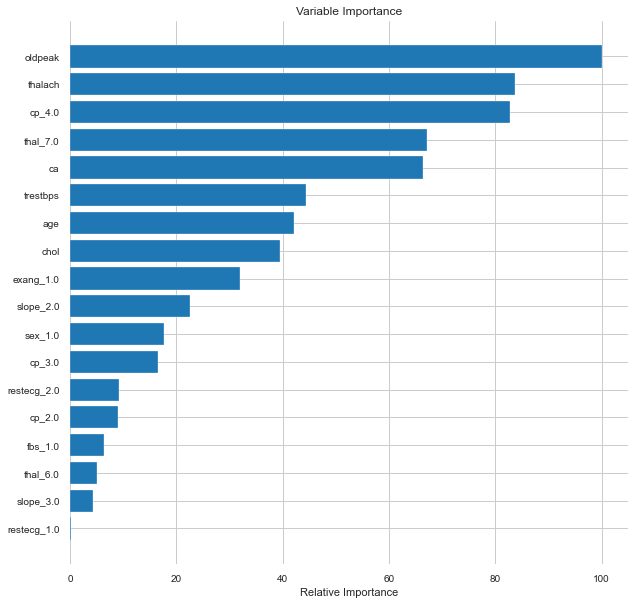

In [40]:
## relative importance of features output from random forest
feature_importance = rf.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [41]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()

model = AdaBoostClassifier(random_state=random_state)
param_grid = {'n_estimators':np.arange(10,200,10),
                'learning_rate':[0.01,0.1,1]
                }
cv = StratifiedKFold(n_splits=5)
scoring = 'recall'

ada,ada_pred,ada_precision,ada_recall,ada_accuracy,ada_auc,ada_fpr,ada_tpr = pipe(X_train, X_test, y_train, y_test, 
                                                                          model, param_grid, cv=cv,scoring=scoring,
                                                                          do_probabilities=False)
print(ada.best_params_)
print('--- %s seconds ---' % round((time.time()-start_time),5))
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(ada_precision,3),
               round(ada_recall,3),round(ada_accuracy,3),round(ada_auc,3)))

{'learning_rate': 0.1, 'n_estimators': 140}
--- 9.92036 seconds ---
Precision:0.784 / Recall:0.829 / Accuracy:0.816 / AUC:0.817


In [42]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

model = GradientBoostingClassifier(random_state=random_state)
param_grid = {'n_estimators':np.arange(10,200,10),
              'learning_rate':[0.1,1,1.1,1.2,1.3]
                }
cv = StratifiedKFold(n_splits=5)
scoring = 'recall'

gb,gb_pred,gb_precision,gb_recall,gb_accuracy,gb_auc,gb_fpr,gb_tpr = pipe(X_train, X_test, y_train, y_test, 
                                                                          model, param_grid, cv=cv,scoring=scoring,
                                                                          do_probabilities=False)
print(gb.best_params_)
print('--- %s seconds ---' % round((time.time()-start_time),5))
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(gb_precision,3),
               round(gb_recall,3),round(gb_accuracy,3),round(gb_auc,3)))

{'learning_rate': 1, 'n_estimators': 20}
--- 5.85584 seconds ---
Precision:0.794 / Recall:0.771 / Accuracy:0.803 / AUC:0.8


In [43]:
#XGBoost
from xgboost import XGBClassifier

start_time = time.time()

model = XGBClassifier(random_state=random_state)
param_grid = {
    'n_estimators': [200],
    'max_depth': [3,5,10],
    'min_child_weight':[1,3,5],
    'learning_rate':[0.1,0.2,0.25]
}
            
cv = StratifiedKFold(n_splits=5)
scoring = 'recall'

xgb,xgb_pred,xgb_precision,xgb_recall,xgb_accuracy,xgb_auc,xgb_fpr,xgb_tpr = pipe(X_train, X_test, y_train, y_test, 
                                                                          model, param_grid, cv=cv,scoring=scoring,
                                                                          do_probabilities=False)
print(xgb.best_params_)
print('--- %s seconds ---' % round((time.time()-start_time),5))
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(xgb_precision,3),
               round(xgb_recall,3),round(xgb_accuracy,3),round(xgb_auc,3)))

{'learning_rate': 0.25, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200}
--- 2.12902 seconds ---
Precision:0.8 / Recall:0.8 / Accuracy:0.816 / AUC:0.815


In [44]:
#LightGBM
import lightgbm as lgb

start_time = time.time()
model = lgb.LGBMClassifier(objective='binary',metric='recall',random_state=random_state)

param_grid = {
    'boosting_type':['gbdt'],
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':[100,200],
    'max_depth':[3,5,10]
 
    }

cv = StratifiedKFold(n_splits=5)
scoring = 'recall'

lgb,lgb_pred,lgb_precision,lgb_recall,lgb_accuracy,lgb_auc,lgb_fpr,lgb_tpr = pipe(X_train, X_test, y_train, y_test, 
                                                                          model, param_grid, cv=cv,scoring=scoring,
                                                                          do_probabilities=False)
print(lgb.best_params_)
print('--- %s seconds ---' % round((time.time()-start_time),5))
print('Precision:{} / Recall:{} / Accuracy:{} / AUC:{}'.format(round(lgb_precision,3),
               round(lgb_recall,3),round(lgb_accuracy,3),round(lgb_auc,3)))

/Users/hhl/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


{'boosting_type': 'gbdt', 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
--- 1.18791 seconds ---
Precision:0.771 / Recall:0.771 / Accuracy:0.789 / AUC:0.788


18


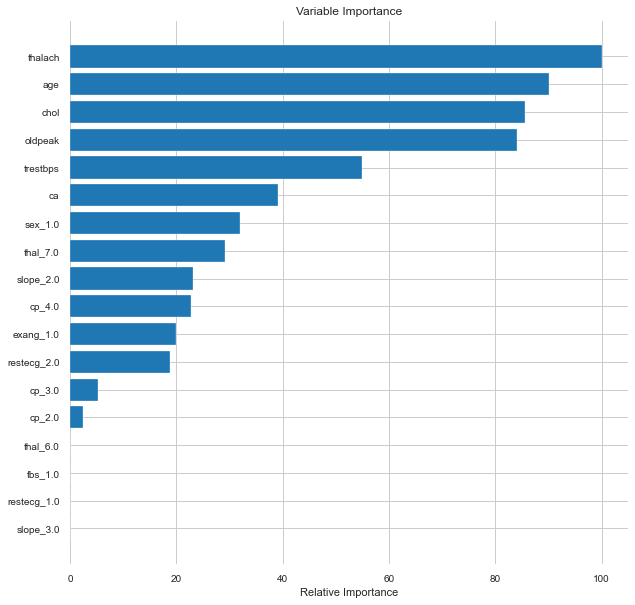

In [45]:
## relative importance of features output from LightGBM
feature_importance = lgb.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [46]:
# #MLPNN
# from sklearn.neural_network import MLPClassifier
# start_time = time.time()

# model = MLPClassifier(max_iter=1000)

# param_grid = {
#     'hidden_layer_sizes': [(10,),(20,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.001,0.01, 0.05],
#     'learning_rate': ['constant','adaptive']
#     }

# cv = StratifiedKFold(n_splits=5)
# scoring = 'recall'

# model,pred,precision,recall,accuracy = pipe(X_train, X_test, y_train, y_test, 
#                                                      model=model, param_grid=param_grid, cv=cv,scoring=scoring,
#                                                     do_probabilities=False)

# print(model.best_params_)
# print('--- %s seconds ---' % round((time.time()-start_time),5))
# print('Precision:{} / Recall:{} / Accuracy:{}'.format(round(precision,3),
#                round(recall,3),round(accuracy,3)))

In [47]:
# #MLPNN without GridSearchCV
# start_time = time.time()


# mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=1000)
# mlp.fit(X_train,y_train)
# y_pred = mlp.predict(X_test)

# print('--- %s seconds ---' % round((time.time()-start_time),5))
# precision,recall,fscore,support = score(y_test, y_pred, pos_label=1, average='binary')
# print('Precision:{} / Recall:{} / Accuracy:{}'.format(round(precision,3),
#                round(recall,3),
#                round((y_pred==y_test).sum()/len(y_pred),3)))

# Comparison

| No. | Model | Precision | Recall | Accuracy | AUC | Time(s)-Total |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | Naive Bayes | 0.725 | 0.829 | 0.776 | 0.78 | 0.002 |
| 2 | Logistic Regression | 0.784 | 0.829 | 0.816 | 0.817 | 1.3 |
| 3 | kNN | 0.757 | 0.8 | 0.789 | 0.79 | 0.09|
| 4 | SVM | 0.812 | 0.743 | 0.803 | 0.798 | 1.9 |
| 5 | Decision Tree | 0.8 | 0.686 | 0.776 | 0.77 | 0.2 |
| 6 | Random Forest | 0.853 | 0.829 | 0.855 | 0.853 | 4.4|
| 7 | AdaBoost | 0.784 | 0.829 | 0.816 | 0.817 | 9.9 |
| 8 | Gradient Boosting | 0.794 | 0.771 | 0.803 | 0.8 | 5.6 |
| 9 | XGBoost | 0.8 | 0.8 | 0.816 | 0.815 | 2.1|
| 10 | lightGBM | 0.771 | 0.771 | 0.789 | 0.788 | 1.2|



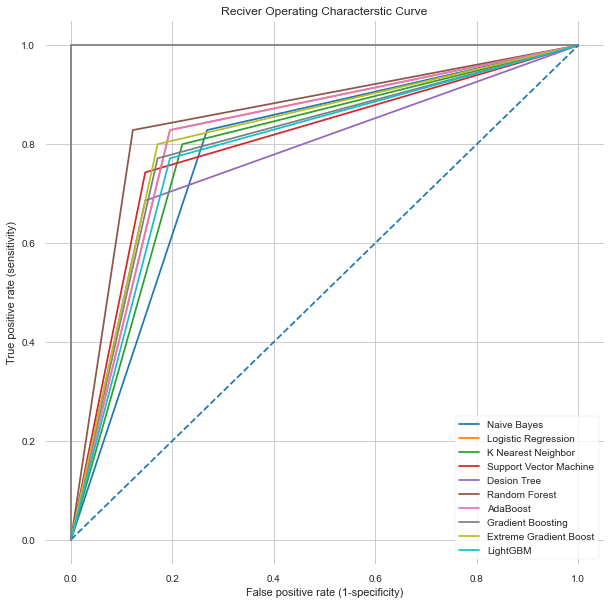

In [48]:
##ROC curves

plt.figure(figsize=(10,10))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(gnb_fpr,gnb_tpr,label='Naive Bayes')
plt.plot(lr_fpr,lr_tpr,label='Logistic Regression')
plt.plot(knn_fpr,knn_tpr,label='K Nearest Neighbor')
plt.plot(svm_fpr,svm_tpr,label='Support Vector Machine')
plt.plot(tree_fpr,tree_tpr,label='Desion Tree')
plt.plot(rf_fpr,rf_tpr,label='Random Forest')
plt.plot(ada_fpr,ada_tpr,label='AdaBoost')
plt.plot(gb_fpr,gb_tpr,label='Gradient Boosting')
plt.plot(xgb_fpr,xgb_tpr,label='Extreme Gradient Boost')
plt.plot(lgb_fpr,lgb_tpr,label='LightGBM')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate (sensitivity)')
plt.xlabel('False positive rate (1-specificity)')
plt.legend()
plt.show()

## Conclusions

1. Model: 
  * Random Forest outperforms other models

2. Top risk factors/symptoms of heart disease include --- not consistent btw different algorithms:

3. Future improvement:
  * interactive dashboard